<a href="https://colab.research.google.com/github/vkjadon/tf/blob/main/tf201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem Statement

Let us suppose that an experimental drug was tested on individuals ranging from age 13 to 100. In a clinical trial, this trial had 2100 participants total, half of these participants were under the age of 65. And half were 65 years or older. And the conclusions from this trial was that around 95% of the patients who were in the older population, the 95% of those patients experienced side effects.
And around 95% of patients who were under 65 years old, experienced no side effects.


In [288]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

#Create Training Data 

In [289]:
X_train=[]
y_train=[]

In [290]:
#The ~5% of youger inividuals (13 to 64) who did experience side effects
# 1 for side effect and 0 for no side effect
for i in range(50):
  random_youger=randint(13,64)
  X_train.append(random_youger)
  y_train.append(1)
print(X_train)
print(y_train)

[17, 60, 46, 50, 55, 62, 38, 22, 30, 63, 62, 30, 56, 30, 45, 38, 39, 64, 25, 18, 41, 32, 28, 13, 21, 34, 62, 30, 64, 31, 41, 46, 55, 31, 21, 64, 38, 52, 33, 32, 38, 42, 44, 16, 17, 58, 29, 56, 45, 24]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [291]:
#The ~5% of older inividuals (65 to 100) who did not experience side effects
for i in range(50):
  X_train.append(randint(65,100))
  y_train.append(0)
print(len(X_train))
print(len(y_train))

100
100


In [292]:
#The ~95% of younger inividuals (13 to 64) who did not experience side effects
for i in range(1000):
  X_train.append(randint(13,64))
  y_train.append(0)
print(len(X_train))
print(len(y_train))

1100
1100


In [293]:
#The ~95% of older inividuals (65 to 100) who did experience side effects
for i in range(1000):
  X_train.append(randint(65,100))
  y_train.append(1)
print(len(X_train))
print(len(y_train))

2100
2100


In [294]:
#for sample in X_train:
#  print(sample)

In [295]:
#for label in y_train:
#  print(label)

In [296]:
type(X_train)

list

So we have our data generated. Now we need to process it to be in the format for which we saw the fit function expects, and we discussed the fact that we are going to be passing this data as NumPy arrays to the fit function.
So our next step is to go ahead and do that transformation here, where we are taking the
train labels list and making that now a NumPy array. Similarly, doing the same thing with the train samples list. 

In [297]:
X_train=np.array(X_train)
y_train=np.array(y_train)

In [298]:
type(X_train)

numpy.ndarray

And then we use the shuffle function to shuffle both are trained labels and trained samples
respective to each other so that we can get rid of any imposed order from the data generation
process. 

In [299]:
X_train, y_train=shuffle(X_train, y_train)
#for label in y_train:
#  print(label)

Now we are using this min max scalar object to create a feature range ranging from zero to one, which we'll then use in this next line to rescale our data from the current scale of 13 to 100, down to a scale of zero to one, and then this reshaping that we're doing here is just a formality because the fit transform function doesn't accept one D data by default.

In [300]:
X_train_normal=MinMaxScaler(feature_range=(0,1)).fit_transform(X_train.reshape(-1,1))
print(X_train_normal.shape)

(2100, 1)


# Create Model

In [301]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

We shall build a sequential model. A sequential model is described as a linear stack of layers. It is the most simple model that we can build using Keras or TensorFlow.  
So we are initializing the model as an instance of the sequential class.

In [302]:
model=Sequential([
    Dense(16, input_shape=(1,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

Even if we use input_shape=(50,50,3), when keras sends us messages, or when we print the model summary, it will show (None,50,50,3).  
The comma is necessary when you have only one dimension. The comma does not create a second dimension. It's just python notation for creating a tuple that contains only one element. input_shape(728,) is the same as batch_input=(batch_size,728). This means that each sample has 728 values.

In [303]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 16)                32        
                                                                 
 dense_28 (Dense)            (None, 32)                544       
                                                                 
 dense_29 (Dense)            (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


#Train model
[model.compile](https://keras.io/api/models/model_training_apis/) Documentation

In [304]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [305]:
model.fit(x=X_train_normal, y=y_train, validation_split=0.1, batch_size=10, epochs=30, verbose=2, shuffle=True)

Epoch 1/30
189/189 - 1s - loss: 0.6643 - accuracy: 0.5667 - val_loss: 0.6361 - val_accuracy: 0.6381 - 935ms/epoch - 5ms/step
Epoch 2/30
189/189 - 0s - loss: 0.6366 - accuracy: 0.6688 - val_loss: 0.6023 - val_accuracy: 0.7238 - 333ms/epoch - 2ms/step
Epoch 3/30
189/189 - 0s - loss: 0.6060 - accuracy: 0.7317 - val_loss: 0.5665 - val_accuracy: 0.8143 - 370ms/epoch - 2ms/step
Epoch 4/30
189/189 - 0s - loss: 0.5734 - accuracy: 0.7788 - val_loss: 0.5315 - val_accuracy: 0.8429 - 351ms/epoch - 2ms/step
Epoch 5/30
189/189 - 0s - loss: 0.5407 - accuracy: 0.8058 - val_loss: 0.4952 - val_accuracy: 0.8619 - 358ms/epoch - 2ms/step
Epoch 6/30
189/189 - 0s - loss: 0.5077 - accuracy: 0.8307 - val_loss: 0.4613 - val_accuracy: 0.8762 - 381ms/epoch - 2ms/step
Epoch 7/30
189/189 - 0s - loss: 0.4761 - accuracy: 0.8534 - val_loss: 0.4263 - val_accuracy: 0.8952 - 360ms/epoch - 2ms/step
Epoch 8/30
189/189 - 0s - loss: 0.4466 - accuracy: 0.8672 - val_loss: 0.3943 - val_accuracy: 0.9095 - 366ms/epoch - 2ms/step


#Creating Test Set

In [306]:
X_test=[]
y_test=[]

In [307]:
#The ~5% of of the Test Data (420) youger inividuals (13 to 64) who did experience side effects
for i in range(10):
  random_younger=randint(13,64)
  X_test.append(random_younger)
  y_test.append(1)

#The ~5% of of the Test Data (420) youger inividuals (65 to 100) who did not experience side effects
  random_older=randint(65,100)
  X_test.append(random_older)
  y_test.append(0)

#The ~95% of of the Test Data (420) youger inividuals (13 to 64) who did not experience side effects
for i in range(200):
  random_younger=randint(13,64)
  X_test.append(random_younger)
  y_test.append(0)

#The ~95% of of the Test Data (420) youger inividuals (65 to 100) who did experience side effects
  random_older=randint(65,100)
  X_test.append(random_older)
  y_test.append(1)


#Prediction

In [308]:
X_test=np.array(X_test)
y_test=np.array(y_test)
X_test, y_test=shuffle(X_test, y_test)

In [309]:
X_test_scaled=MinMaxScaler(feature_range=(0,1)).fit_transform(X_test.reshape(-1,1))

In [310]:
predictions=model.predict(X_test_scaled, batch_size=10, verbose=0)

So for each sample in our tests that we are getting a probability that maps to either the patient not experiencing a side effect, or the patient experiencing a side effect.
So, let us try to see the output (prediction) for the first sample in our test set:


In [311]:
print(predictions[3])

[0.2583858  0.74161416]


The first value of the prediction indicates the probability to the patient, not experiencing a side effect, and the second value indicates the probability of the patient experiencing a side effect.

So that is how we know that this particular probability maps to not having a side effect because it's in the zeroeth index. And this specific probability maps to having a side effect because it is in the first index.



So, if we're interested in seeing only the most probable prediction for each sample in the test set, then we can run this cell here, which is taking the predictions and getting the index of the prediction with the highest probability.
And if we print that out, then we can see that these are a little bit easier to interpret than the previous output. So we can see for the first sample that the prediction is zero, the second sample is a one. And just to confirm, if we go back up here, we can see that the first sample indeed has the higher probability of a label of zero, meaning no side effects. And the second sample has a higher probability of one meaning that the patient did experience
a side effect. So from these prediction results, we're able to actually see the underlying predictions.

In [312]:
predict_index=np.argmax(predictions, axis=1)
print(predict_index)

[0 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0
 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 1 1 1 0 1 1 1 0 0 1 0 1 1 0 1 1 0 1 1 0 1 1
 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 1 0 1 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1
 1 1 1 1 0 1 0 0 0 0 1 1 0 1 1 0 0 1 0 1 0 0 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1
 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 1 0 0 1 0
 0 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 1 1 0 0 0 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0
 0 1 0 1 0 0 0 1 1 0 1 1 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 1 1
 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0
 0 0 0 1 1 0 0 1 0 0 1 1 1 1 0 1 1 0 0 1 0 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 0
 0 1 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0
 1 1 1 1 0 0 1 1 1 0 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 0 1 0 0 1 1 1 0 0
 0 0 1 1 1 0 1 1 1 1 1 0 1]


In [313]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

#Confusion Matrix

In [314]:
cm=confusion_matrix(y_test, predict_index)

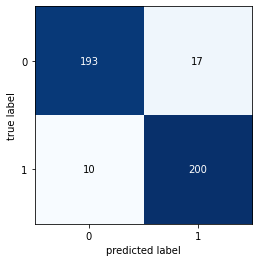

In [315]:
from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(cm)
plt.show()